In this notebook, we simulate the stochastic process from Chapter 8 of the thesis and study its distribution.

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from struct import pack, unpack

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [2]:
# Simulation parameters
num_trials = 1000000  # Number of independent simulations
max_n = 1000        # Maximum number of steps
rng = np.random.default_rng(1331)

stoch_process = np.zeros((num_trials, 3))
for m in range(2, max_n + 1):
    step = rng.beta(m-1, 1, (num_trials, 3))
    U, V, W = step[:, 0], step[:, 1], step[:, 2]
    
    stoch_process[:, 0] = U - V + U * V * stoch_process[:, 0]
    stoch_process[:, 1] = V - W + V * W * stoch_process[:, 1]
    stoch_process[:, 2] = W - U + W * U * stoch_process[:, 2]
    
stoch_process.shape, stoch_process[:10]

((1000000, 3),
 array([[ 0.01214861,  0.02389787, -0.03475802],
        [ 0.00239615, -0.02687837,  0.0240892 ],
        [ 0.04599521, -0.00469641, -0.04157202],
        [-0.021644  , -0.00635945,  0.0273367 ],
        [-0.01884119, -0.002715  ,  0.02108258],
        [ 0.01851333,  0.01736792, -0.03606224],
        [ 0.00264284, -0.01250866,  0.01054372],
        [-0.02346877,  0.01330459,  0.00995599],
        [ 0.02373363, -0.01271717, -0.01267686],
        [ 0.02331364, -0.01286181, -0.01053297]]))

In [12]:
np.sum((np.sum(stoch_process > 0, axis=1) == 0) + (np.sum(stoch_process > 0, axis=1) == 3)) / num_trials

8.9e-05

Claim: $\begin{pmatrix}
    \widetilde{X}_m^p \\
    \widetilde{X}_m^q \\
    \widetilde{X}_m^r \\
    \end{pmatrix}
    \xrightarrow[]{d}
    \mathcal{N}\left(0, 
    \begin{pmatrix}
    1 & -\frac{1}{2} & -\frac{1}{2}\\
    -\frac{1}{2} & 1 & -\frac{1}{2}\\
    -\frac{1}{2} & -\frac{1}{2} & 1
    \end{pmatrix}
    \right)$

In [3]:
rng = np.random.default_rng(2025)
vecs = rng.normal(0, 1, (1000, 3))
vecs /= np.linalg.norm(vecs, axis=1, keepdims=True)
vecs[:10]

array([[-0.97173881,  0.01137415, -0.23578445],
       [-0.40370526, -0.87300808,  0.2736402 ],
       [-0.71123932,  0.24996164,  0.65700671],
       [ 0.39086804, -0.26505513,  0.88145786],
       [ 0.2837914 ,  0.32693886, -0.90142855],
       [-0.12915295, -0.22290625,  0.96624651],
       [-0.30182077,  0.57103978, -0.76342504],
       [-0.26640478, -0.95523843,  0.12863915],
       [ 0.83583435, -0.41101968,  0.36392823],
       [ 0.7518676 ,  0.62163318, -0.21969822]])

In [4]:
v = vecs[0]
lin_comb = stoch_process @ v
lin_comb.shape, lin_comb[:10]

((1000000,),
 array([-0.00333805, -0.008314  , -0.03494672,  0.01451441,  0.01330689,
        -0.00928966, -0.00519647,  0.02060937, -0.02021853, -0.02031755]))

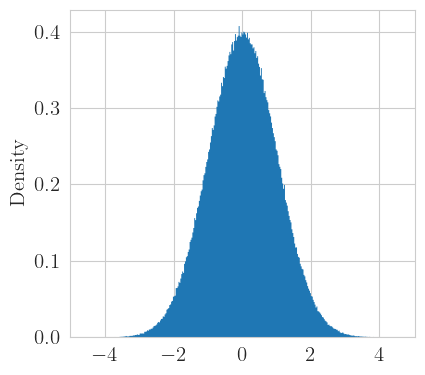

In [39]:
sns.set_style(style="whitegrid")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'
mpl.rcParams['font.size'] = 15

# Plot with error bars
plt.figure(figsize=(4.5, 4))

sns.histplot(lin_comb/np.sqrt(np.var(lin_comb)), stat='density', element="step", alpha=1, linewidth=0, ax=plt.gca())
plt.xticks([-4, -2, 0, 2, 4], [r"$-4$", r"$-2$", r"$0$", r"$2$", r"$4$"])

plt.tight_layout()

# fig.savefig(FIG_DIR / "distr_trans_lcs.svg")
plt.savefig(FIG_DIR / "8_distribution.png", dpi=300)
plt.savefig(FIG_DIR / "8_distribution.pdf")
plt.show()
plt.close()

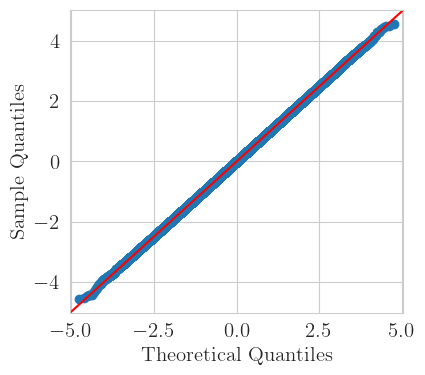

In [33]:
sns.set_style(style="whitegrid")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cm'
mpl.rcParams['font.size'] = 15

# Plot with error bars
plt.figure(figsize=(4.5, 4))
sm.qqplot(lin_comb/np.sqrt(np.var(lin_comb)), line='45', ax=plt.gca())

plt.tight_layout()

plt.savefig(FIG_DIR / "8_qq_plot.png", dpi=300)
# plt.savefig(FIG_DIR / "8_qq_plot.pdf")
plt.show()
plt.close()

In [5]:
from scipy import stats

sorted_data = np.sort(lin_comb / np.sqrt(np.var(lin_comb)))
theoretical_quantiles = stats.norm.ppf((np.arange(1, len(sorted_data)+1) - 0.5) / len(sorted_data))

qq_points = np.column_stack((theoretical_quantiles, sorted_data))
qq_points[:10]  

array([[-4.89163848, -4.57790181],
       [-4.67081982, -4.53968165],
       [-4.56478773, -4.4630753 ],
       [-4.49368851, -4.45940195],
       [-4.43990165, -4.45918934],
       [-4.39652045, -4.42684742],
       [-4.36010508, -4.36410066],
       [-4.32868838, -4.35818938],
       [-4.30103787, -4.27565306],
       [-4.27632944, -4.25435931]])

In [9]:
diffs = []

for i in range(vecs.shape[0]):
    v = vecs[i]
    lin_comb = stoch_process @ v
    sorted_data = np.sort(lin_comb / np.sqrt(np.var(lin_comb)))
    theoretical_quantiles = stats.norm.ppf((np.arange(1, len(sorted_data)+1) - 0.5) / len(sorted_data))
    qq_points = np.column_stack((theoretical_quantiles, sorted_data))
    diffs.append(np.average(np.abs(qq_points[:, 0] - qq_points[:, 1])))

np.average(diffs)

0.0012100895701075936

In [11]:
np.cov(stoch_process.T)

array([[ 0.00066687, -0.00033367, -0.00033291],
       [-0.00033367,  0.00066552, -0.00033158],
       [-0.00033291, -0.00033158,  0.00066491]])

In [12]:
np.corrcoef(stoch_process.T)

array([[ 1.        , -0.50085292, -0.49994626],
       [-0.50085292,  1.        , -0.4984521 ],
       [-0.49994626, -0.4984521 ,  1.        ]])